# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [288]:
# read the titanic train.csv file into a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [289]:
# show the percentage of the passengers that boarded at different ports
grouped_data=df.value_counts('Embarked')

percentage = (grouped_data / grouped_data.sum())

print(percentage)


Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: count, dtype: float64


C:\Users\12789\AppData\Local\Temp\ipykernel_19692\3331092302.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: xlabel='Embarked'>

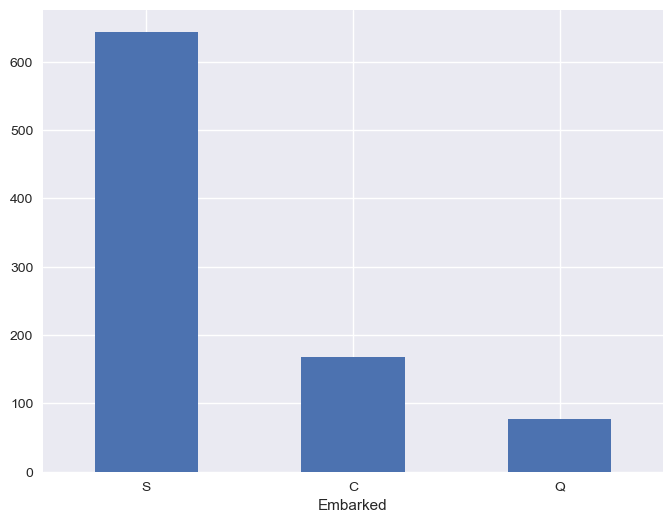

In [290]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
plt.style.use('seaborn')
grouped_data.plot.bar(figsize=(8,6),rot=0)

![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [291]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
members_by_gender=df.value_counts('Sex',ascending=True)

survivors=df[df['Survived']==1]
survivors_by_gender=survivors.value_counts('Sex')

percentage=survivors_by_gender/members_by_gender
print(percentage)

Sex
female    0.742038
male      0.188908
Name: count, dtype: float64


<AxesSubplot: >

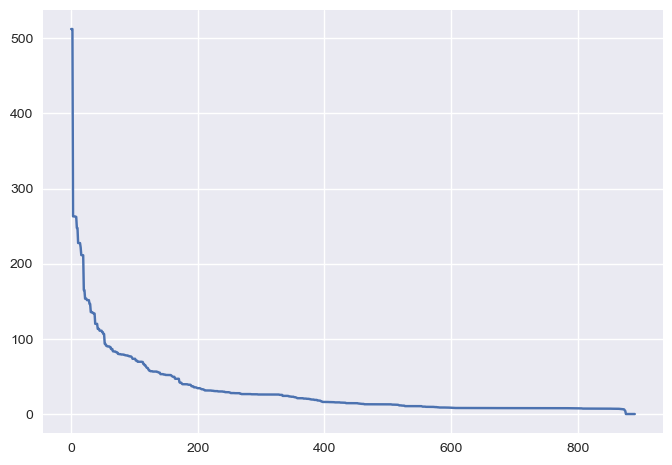

In [292]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
ticket_prices=df.loc[:,'Fare']
ticket_prices=ticket_prices.sort_values(ascending=False)
ticket_prices.reset_index()['Fare'].plot()


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



Text(0.5, 0, 'Pclass3')

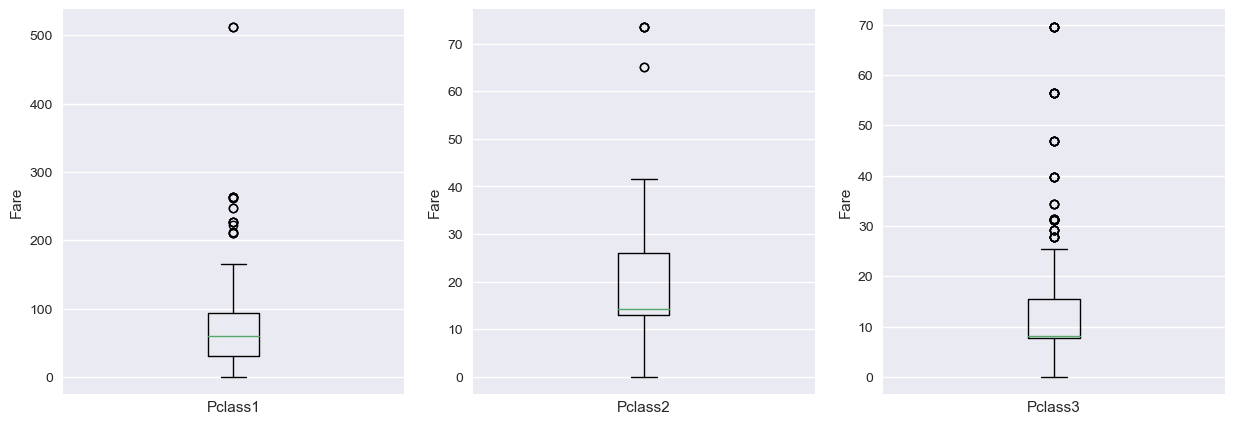

In [293]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
fig, ax=plt.subplots(1,3,figsize=(15,5))
Pclass1=df[df['Pclass']==1]['Fare']
Pclass2=df[df['Pclass']==2]['Fare']
Pclass3=df[df['Pclass']==3]['Fare']
ax[0].boxplot(Pclass1)
ax[1].boxplot(Pclass2)
ax[2].boxplot(Pclass3)
for i in range(0,3):
    ax[i].set_ylabel('Fare')
    ax[i].set_xticks([])
ax[0].set_xlabel('Pclass1')
ax[1].set_xlabel('Pclass2')
ax[2].set_xlabel('Pclass3')


![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [294]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
df_survival_status=df.groupby('Pclass').count()
df_survived=df[df['Survived']==1].groupby('Pclass').count()
percentage=df_survived['Survived']/df_survival_status['Survived']
print(f'for people with ticket class 1,the survival rate is the highest, which is {percentage[1]:.3f}')

for people with ticket class 1,the survival rate is the highest, which is 0.630


In [312]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below


![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
